# Sección C - BOPS

## 1. ¿Deberían expandirse a Canadá?

Para responder esta pregunta, realicé un análisis de gráficos dónde se presenta un simple ajuste lineal, el cual permite observar fácilmente las tendencias. Este ejercicio se realizó tanto en los datos de ventas online y tiendas físicas, tomando en cuenta varios niveles de agregación en función de si estaba o no funcionando el BOPS, la cercanía/lejanía de la tiendas físicas, y si las tiendas están en USA o Canadá (algo importante puesto que en Canadá no se lanzó el BOPS).

Si bien las tendencias de los gráficos antes/después del BOPS (en sus distintos niveles de agregación) muestran consistentemente en un retroceso en las ventas, esto pareciese estar ocasionado por variaciones estacionales (lo cual es más claro en los gráficos con ajustes de mayor orden que uso para responder la pregunta 2, en los cuales es claro un efecto estacional). Esto es muy importante tomarlo en cuenta puesto que el rango elegido para los datos antes/después de BOPS es de seis meses cada uno, es decir, no alcanzan a cubrir un año dónde podría verse claramente un efecto estacional y, tentaviamente, poder tomarlo en cuenta en el análisis. Sin embargo, al analizar los periodos completos de un año, esta tendencia parece que se confirma.

Mi principal recomendación sería solicitar información de años anteriores para poder analizar las variaciones estacionales, además de poder identificar una posible tendencia multi-anual subyacente.

Sin embargo, si tuviese que dar una recomndación sobre si expandirse o no a Canadá en el momento del análisis, mi respuesta sería que NO ES CONVENIENTE LA EXPANSIÓN. Sería recomendable analizar más profundamente el porqué al parecer el BOPS no está teniendo el efecto deseado. Descartar problemas en su implementación o bien que una tendencia a la baja en las vents estuviese enmascarando un avance de ventas con entrega por BOPS. En este sentido sería conveniente intentar conseguir datos con las ventas dónde se usa BOPS. 

Sustento mi recomendación principalmente al observar que la entrada en marcha del BOPS parece no estar afectando positivamente las entregas, ni siquiera cuando se toma en cuenta la cercanía/lejanía con tiendas físicas (lo cual supongo debería de ser un factor que incentivase el uso de BOPS). Cuando analizamos las ventas en línea que tienen cerca tiendas físicas, no se observa variación significativa en la tendencia de las ventas con tiendas físicas lejanas, lo cual sugiere que BOPS no tuvo efecto alguno en esto.

Con respecto al análisis de las ventas en tiendas físicas, se observa que si bien en las ventas en Canadá hay un retroceso después de la entrada en funcionamiento del BOPS, lo cual podría sugerir que esta situación pueda estar influenciada ante el hecho de que en Canadá no están usando BOPS, esto parece descartarse cuando en USA se presenta un comportamiento prácticamente idéntico, lo cual (sin contar con más información) parece sugerir que el BOPS no está teniendo un efecto significativo.

Por lo tanto, reitero que mi recomendación sería posponer el lanzamiento del BOPS en Canadá hasta tener más información más amplia que permita entender el efecto puntual de este programa en las ventas, así cómo un diagnóstico más detallado de la implementación del BOPS en USA.

### Carga y limpieza de los datos (parte de la limpieza se hizo directamente en el archivo CSV)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pandas import DataFrame
import seaborn as sns

## Análisis de datos Online

In [2]:
online = pd.read_csv("Data/bops_online.csv")

In [3]:
print(online.head())
print(online.tail())

   id (DMA)  year  month  week  after  close   sales
0         1  2011      4    17      0      1  18,564
1         1  2011      4    18      0      1  30,883
2         1  2011      5    19      0      1  37,425
3         1  2011      5    20      0      1  32,563
4         1  2011      5    21      0      1  35,773
       id (DMA)  year  month  week  after  close  sales
10705       210  2012      2    10      1      0  9,357
10706       210  2012      3    11      1      0  3,013
10707       210  2012      3    12      1      0  3,155
10708       210  2012      3    13      1      0  2,925
10709       210  2012      3    14      1      0  3,701


In [4]:
print(online.dtypes)
print(online.describe())

id (DMA)     int64
year         int64
month        int64
week         int64
after        int64
close        int64
sales       object
dtype: object
           id (DMA)          year         month         week         after  \
count  10710.000000  10710.000000  10710.000000  10710.00000  10710.000000   
mean     105.500000   2011.274510      6.450980     27.45098      0.490196   
std       60.623921      0.446288      3.533278     15.42074      0.499927   
min        1.000000   2011.000000      1.000000      1.00000      0.000000   
25%       53.000000   2011.000000      3.000000     13.00000      0.000000   
50%      105.500000   2011.000000      7.000000     28.00000      0.000000   
75%      158.000000   2012.000000     10.000000     41.00000      1.000000   
max      210.000000   2012.000000     12.000000     53.00000      1.000000   

              close  
count  10710.000000  
mean       0.480952  
std        0.499660  
min        0.000000  
25%        0.000000  
50%        0.00000

In [5]:
# Limpiando y corrigiendo el tipo de dato
online["sales"] = online["sales"].str.replace(',','')
online["sales"] = online["sales"].astype("float64")


In [6]:
print(online.dtypes)
print(online.describe())

id (DMA)      int64
year          int64
month         int64
week          int64
after         int64
close         int64
sales       float64
dtype: object
           id (DMA)          year         month         week         after  \
count  10710.000000  10710.000000  10710.000000  10710.00000  10710.000000   
mean     105.500000   2011.274510      6.450980     27.45098      0.490196   
std       60.623921      0.446288      3.533278     15.42074      0.499927   
min        1.000000   2011.000000      1.000000      1.00000      0.000000   
25%       53.000000   2011.000000      3.000000     13.00000      0.000000   
50%      105.500000   2011.000000      7.000000     28.00000      0.000000   
75%      158.000000   2012.000000     10.000000     41.00000      1.000000   
max      210.000000   2012.000000     12.000000     53.00000      1.000000   

              close          sales  
count  10710.000000   10710.000000  
mean       0.480952   13755.704855  
std        0.499660   22411.7377

In [7]:
#Verificando resultados reportados en el BOPS case
online.groupby(['after'])['sales'].mean()

after
0    14737.841392
1    12734.282857
Name: sales, dtype: float64

In [8]:
online['year_week'] = online['year'].astype(str) + "-" + online['week'].astype(str)
year_weak_lst = online['year_week'].unique().tolist()
online_grp = online.groupby(['close','after','year_week'])['sales'].mean()
online_grp

close  after  year_week
0      0      2011-17      16158.366972
              2011-18      16914.449541
              2011-19      17632.587156
              2011-20      18530.128440
              2011-21      19518.568807
                               ...     
1      1      2012-5        7179.930693
              2012-6        9273.663366
              2012-7        7726.881188
              2012-8        8826.623762
              2012-9        9925.584158
Name: sales, Length: 102, dtype: float64

<AxesSubplot:title={'center':'Media de ventas en línea por semana'}, xlabel='index', ylabel='sales'>

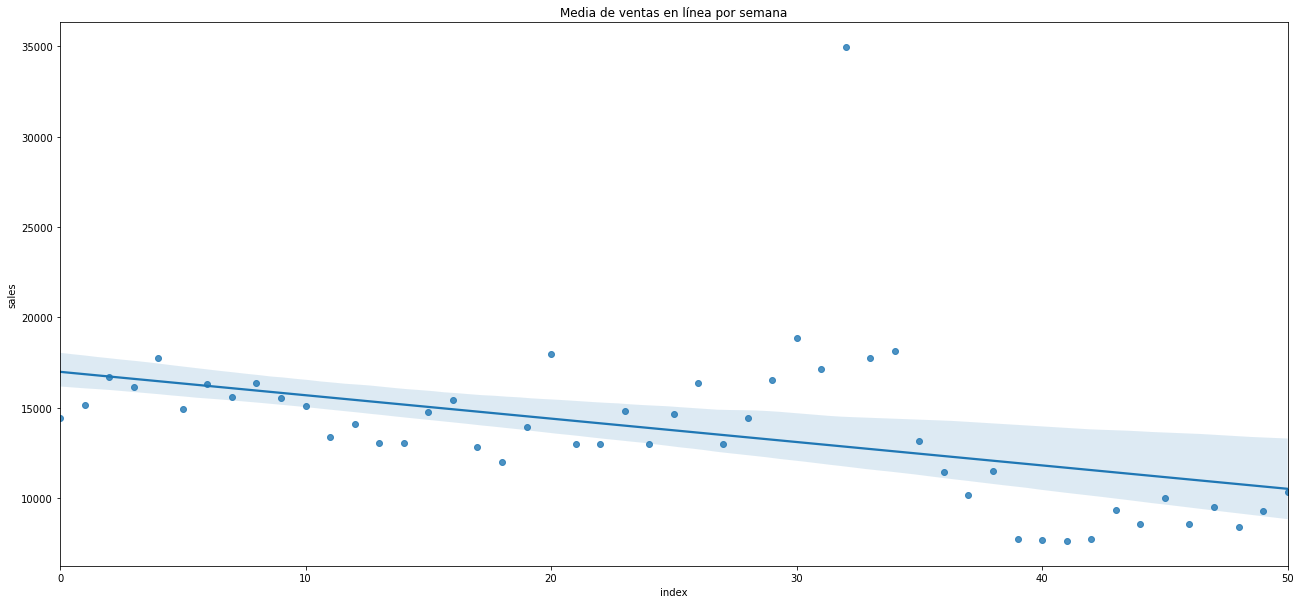

In [9]:
# Media de ventas en línea por semana
plt.figure(figsize=(22,10))
plt.title("Media de ventas en línea por semana")
sns.regplot(x="index", y="sales", data = online.groupby(['year_week'])['sales'].mean().reset_index().reset_index(), order=1)

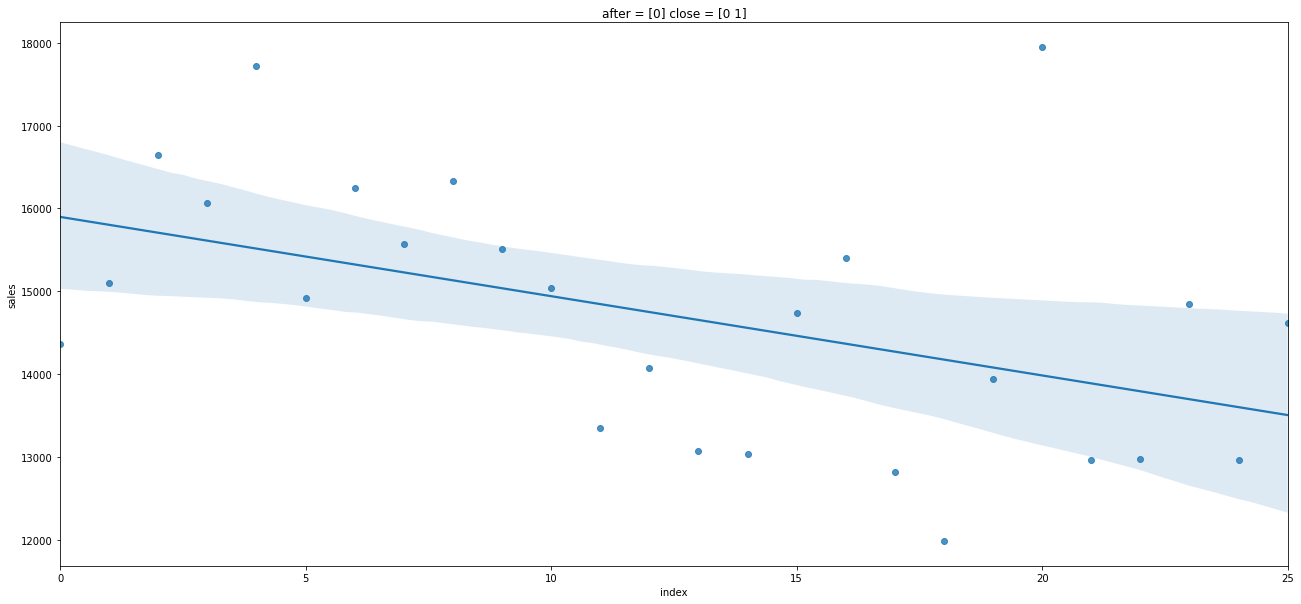

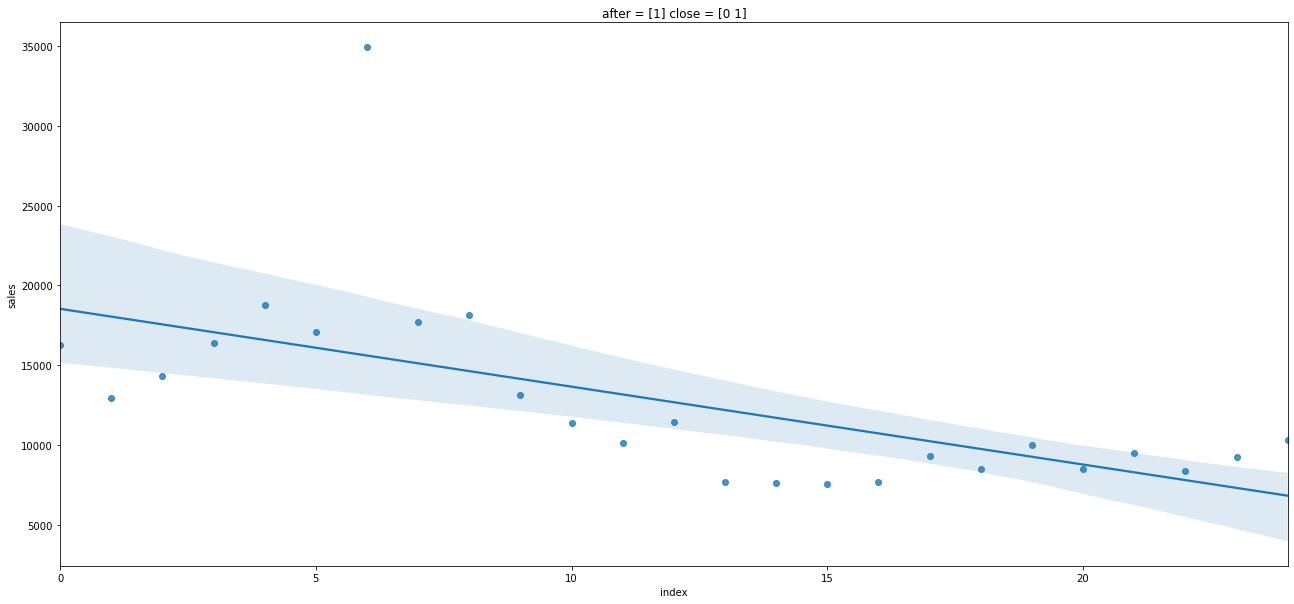

In [10]:
#Media de ventas en línea por semana antes y después de BOPS (sin tomar en cuenta cercanía a tiendas)
for after, online_dum1 in online_grp.groupby(level=1):
    online_dum2 =online_dum1.reset_index().reset_index()
    #print(online_dum2.groupby(['after','close','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=1)


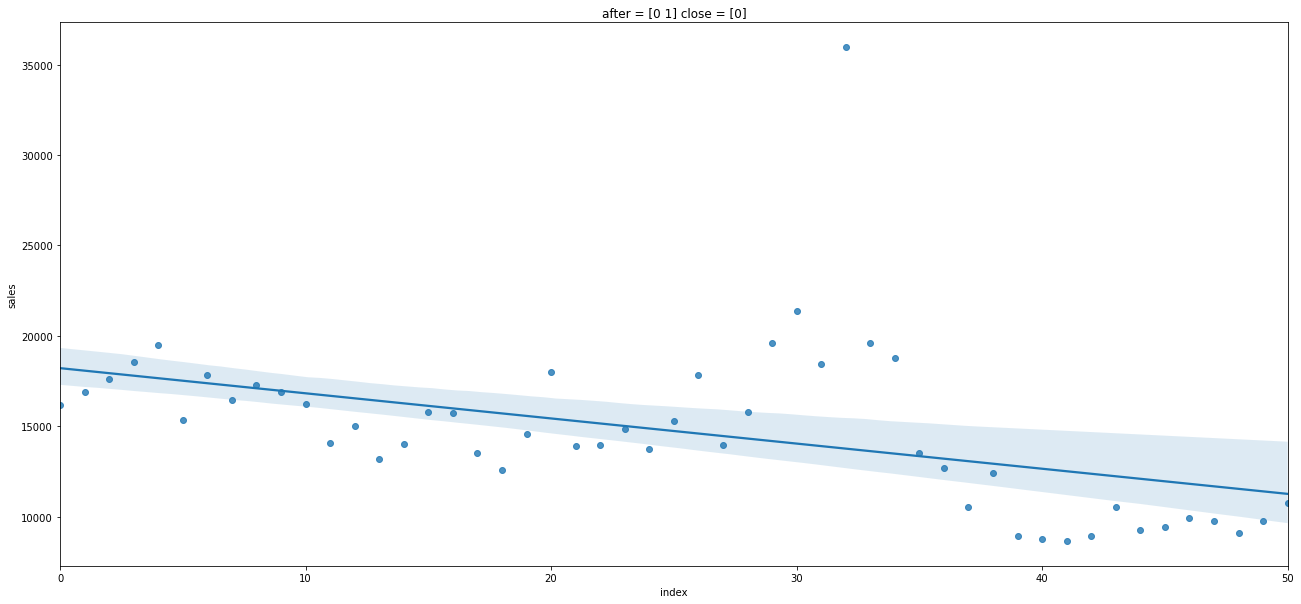

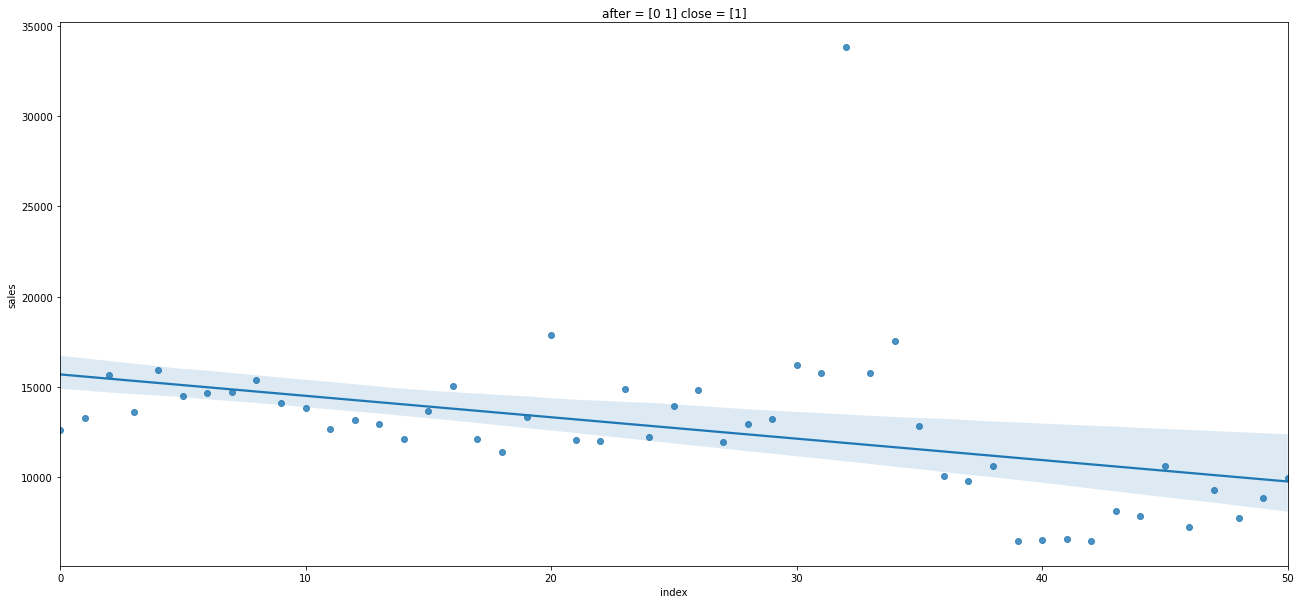

In [11]:
# Media de ventas en línea por semana en función de la cercanía o lejanía de tiendas (sin tomar en cuenta implementación de BOPS)
for after, online_dum1 in online_grp.groupby(level=0):
    online_dum2 =online_dum1.reset_index().reset_index()
    #print(online_dum2.groupby(['close','after','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=1)

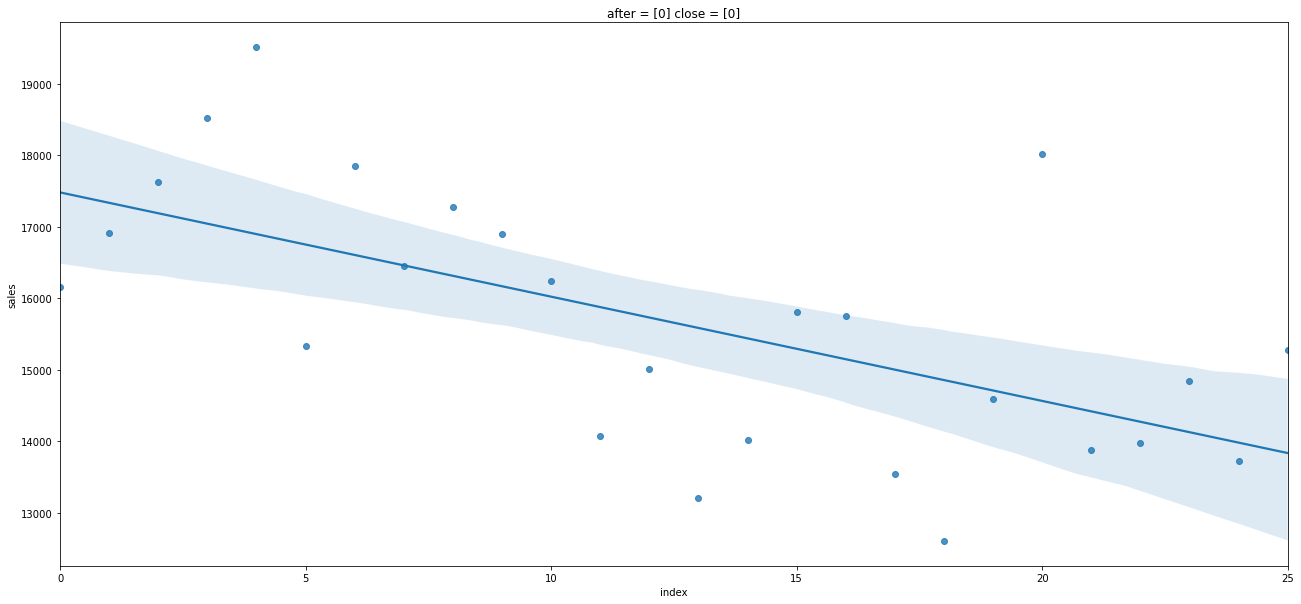

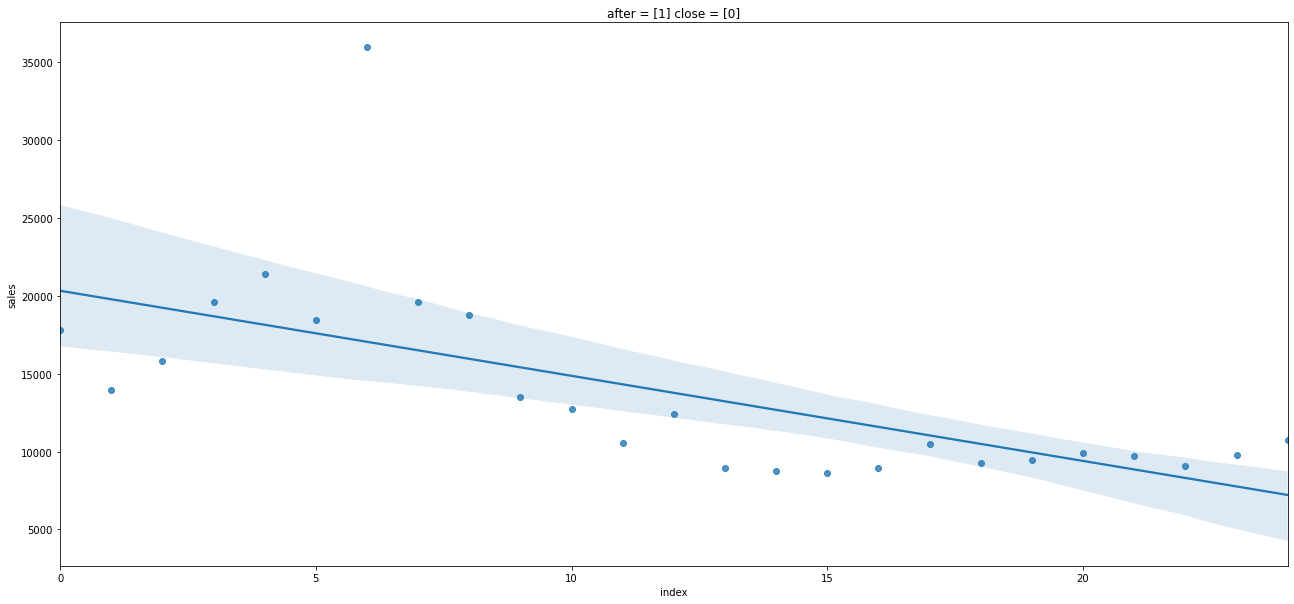

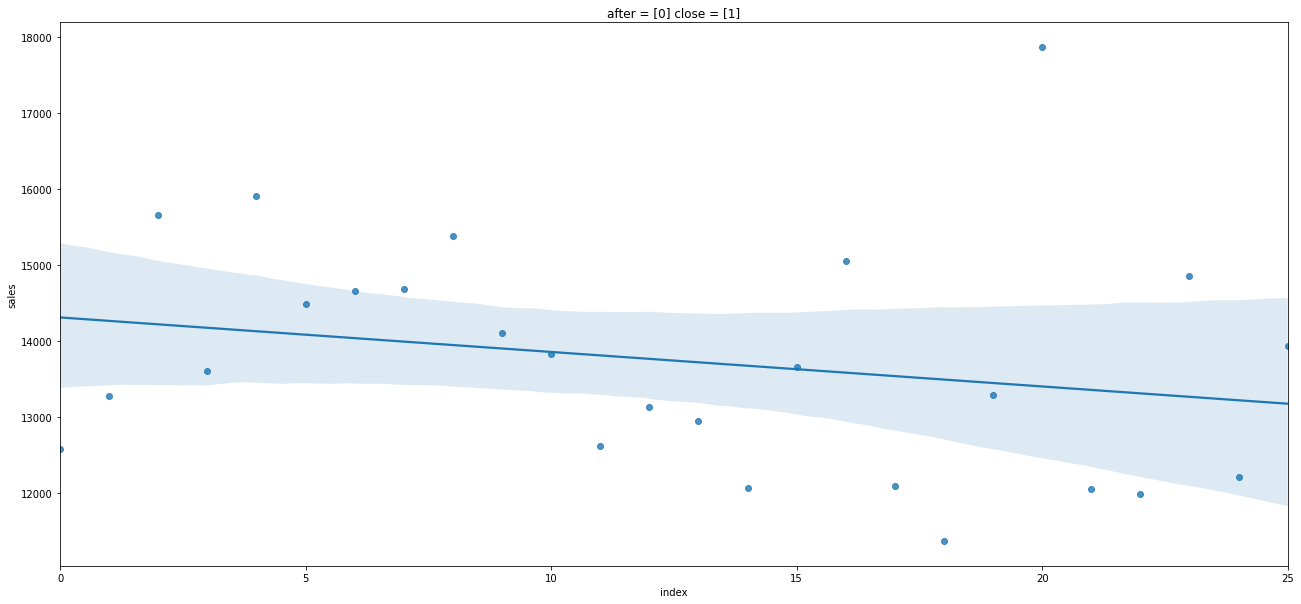

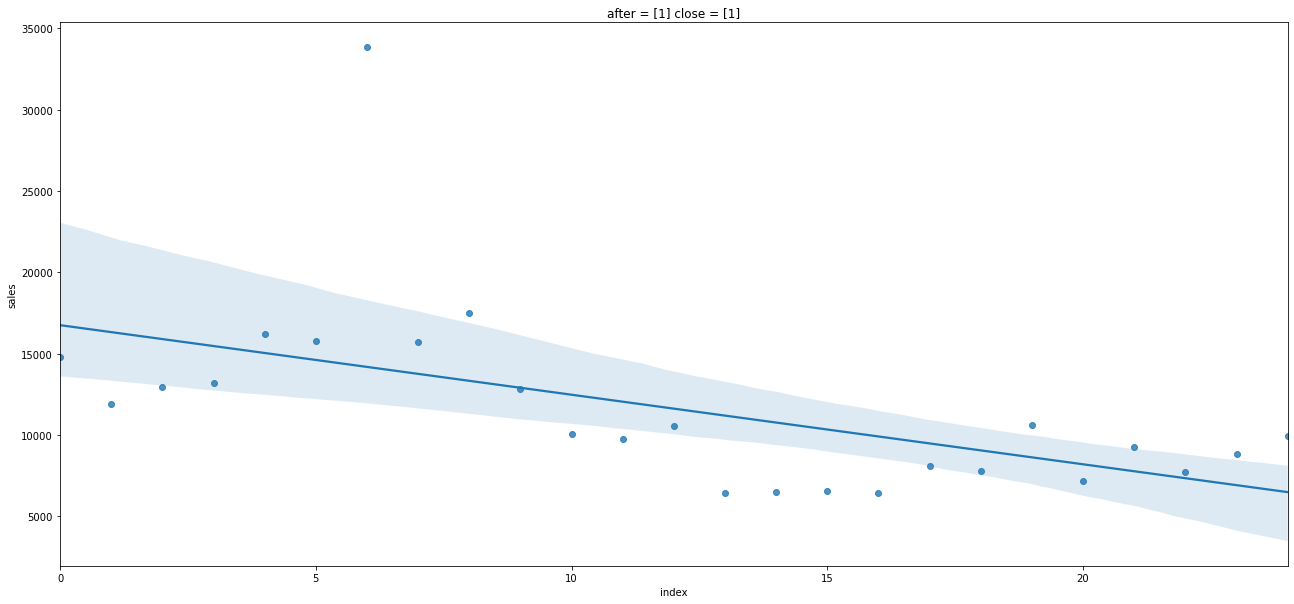

In [12]:
# Media de ventas en línea tomando en cuenta diferentes combinaciones de ventas antes y después de BOPS, y cerca o lejos de las tiendas
for after, online_dum1 in online_grp.groupby(level=[0,1]):
    online_dum2 =online_dum1.reset_index().reset_index()
    #print(online_dum2)
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2, order=1)
    

## Análisis de datos BM (tiendas)

In [13]:
bm = pd.read_csv("Data/bops_bm.csv")

In [14]:
print(bm.head())
print(bm.tail())

   id (store)  year  month  week  usa  after    sales
0           1  2011      4    16    0      0  118,691
1           1  2011      4    17    0      0  113,804
2           1  2011      4    18    0      0  172,104
3           1  2011      5    19    0      0  105,591
4           1  2011      5    20    0      0   94,884
      id (store)  year  month  week  usa  after   sales
4531         169  2012      3    12    1      1  56,331
4532         169  2012      3    13    1      1  74,388
4533         169  2012      3    14    1      1  67,671
4534         169  2012      4    15    1      1  50,140
4535         169  2012      4    16    1      1  75,023


In [15]:
print(bm.dtypes)
print(bm.describe())

id (store)     int64
year           int64
month          int64
week           int64
usa            int64
after          int64
sales         object
dtype: object
        id (store)         year        month         week          usa  \
count  4536.000000  4536.000000  4536.000000  4536.000000  4536.000000   
mean     84.738095  2011.296296     6.314815    26.796296     0.797619   
std      49.434118     0.456674     3.479549    15.228823     0.401819   
min       1.000000  2011.000000     1.000000     1.000000     0.000000   
25%      42.500000  2011.000000     3.000000    14.000000     1.000000   
50%      84.000000  2011.000000     6.000000    26.500000     1.000000   
75%     127.500000  2012.000000     9.000000    40.000000     1.000000   
max     169.000000  2012.000000    12.000000    53.000000     1.000000   

             after  
count  4536.000000  
mean      0.500000  
std       0.500055  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max 

In [16]:
# Limpiando y corrigiendo el tipo de dato
bm["sales"] = bm["sales"].str.replace(',','')
bm["sales"] = bm["sales"].astype("float64")

In [17]:
#Verificando resultados reportados en el BOPS case
bm.groupby(['after'])['sales'].mean()

after
0    67645.710758
1    60100.923280
Name: sales, dtype: float64

In [18]:
bm['year_week'] = bm['year'].astype(str) + "-" + bm['week'].astype(str)
year_weak_lst = bm['year_week'].unique().tolist()
bm_grp = bm.groupby(['usa','after','year_week'])['sales'].mean()
bm_grp

usa  after  year_week
0    0      2011-16      61335.588235
            2011-17      56111.941176
            2011-18      72194.764706
            2011-19      62477.941176
            2011-20      64729.294118
                             ...     
1    1      2012-5       43586.895522
            2012-6       48243.343284
            2012-7       47845.805970
            2012-8       48863.611940
            2012-9       48586.238806
Name: sales, Length: 108, dtype: float64

<AxesSubplot:title={'center':'Media de ventas en tienda por semana'}, xlabel='index', ylabel='sales'>

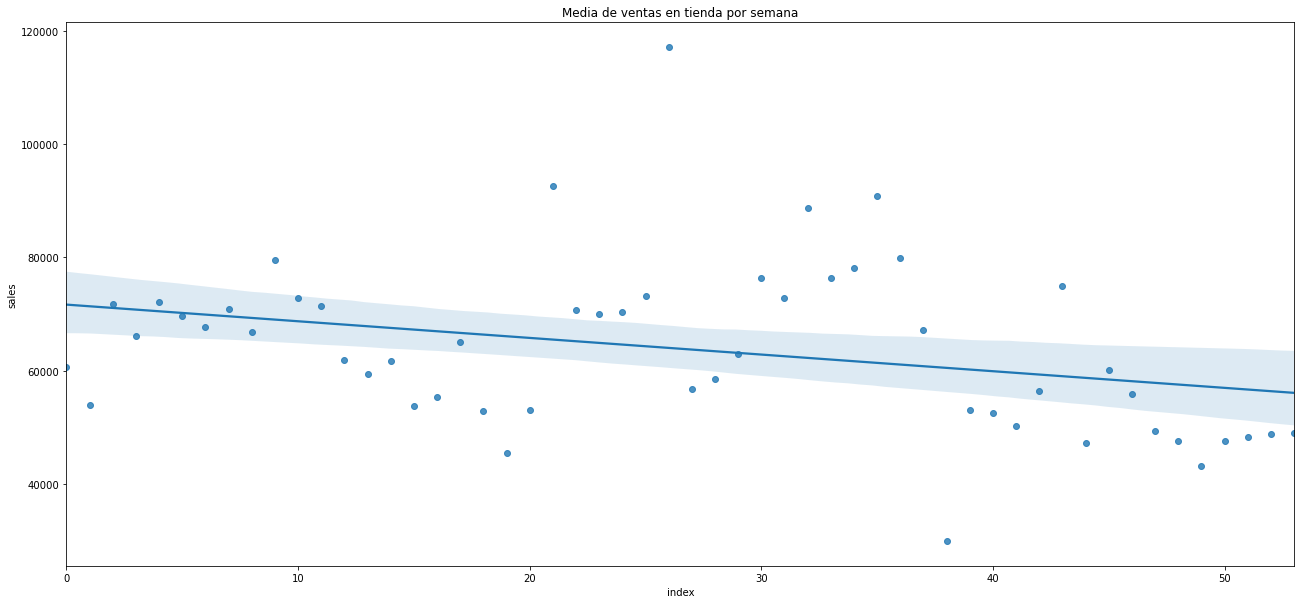

In [19]:
# Media de ventas en tienda por semana
plt.figure(figsize=(22,10))
plt.title("Media de ventas en tienda por semana")
sns.regplot(x="index", y="sales", data = bm.groupby(['year_week'])['sales'].mean().reset_index().reset_index(), order=1)

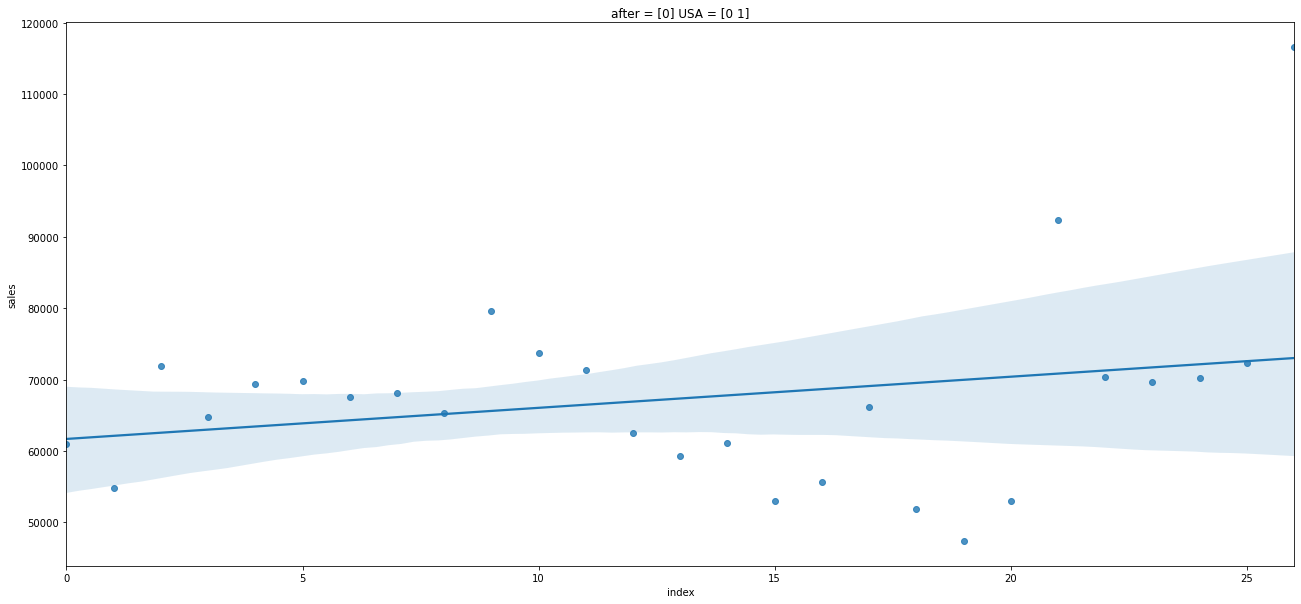

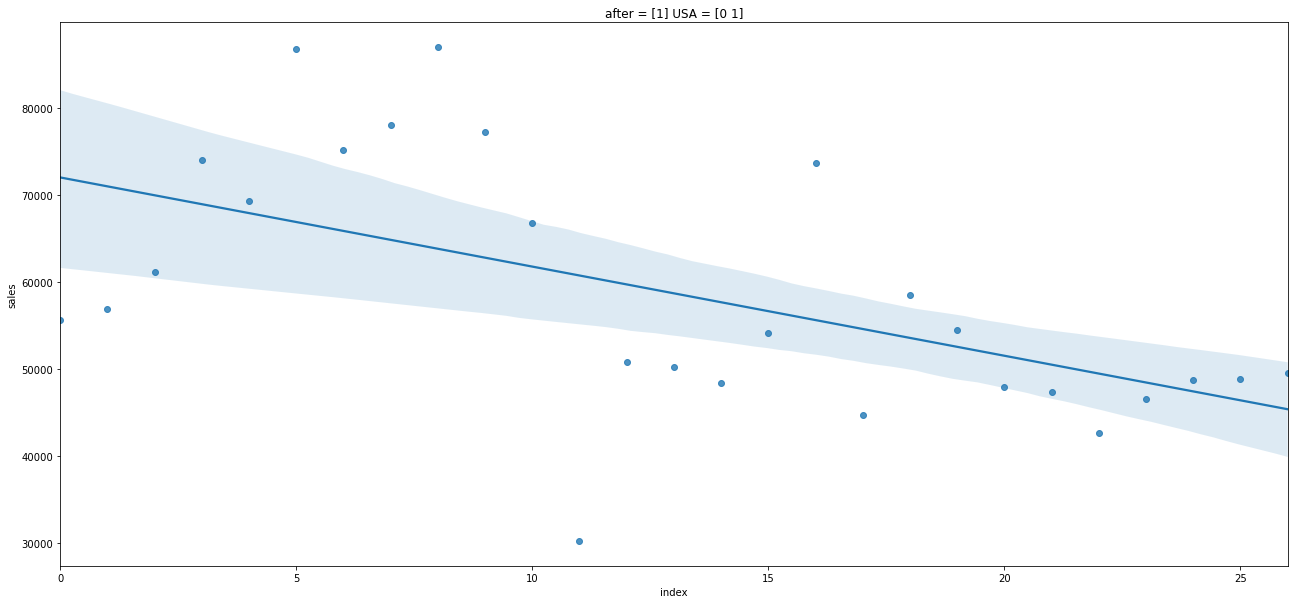

In [20]:
#Media de ventas en tienda por semana antes y después de BOPS (sin tomar en cuenta si están en USA o no)
for after, bm_dum1 in bm_grp.groupby(level=1):
    bm_dum2 =bm_dum1.reset_index().reset_index()
    #print(bm_dum2.groupby(['after','usa','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(bm_dum2["after"].unique()) + " USA = " + str(bm_dum2["usa"].unique()))
    sns.regplot(x="index", y="sales", data = bm_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=1)


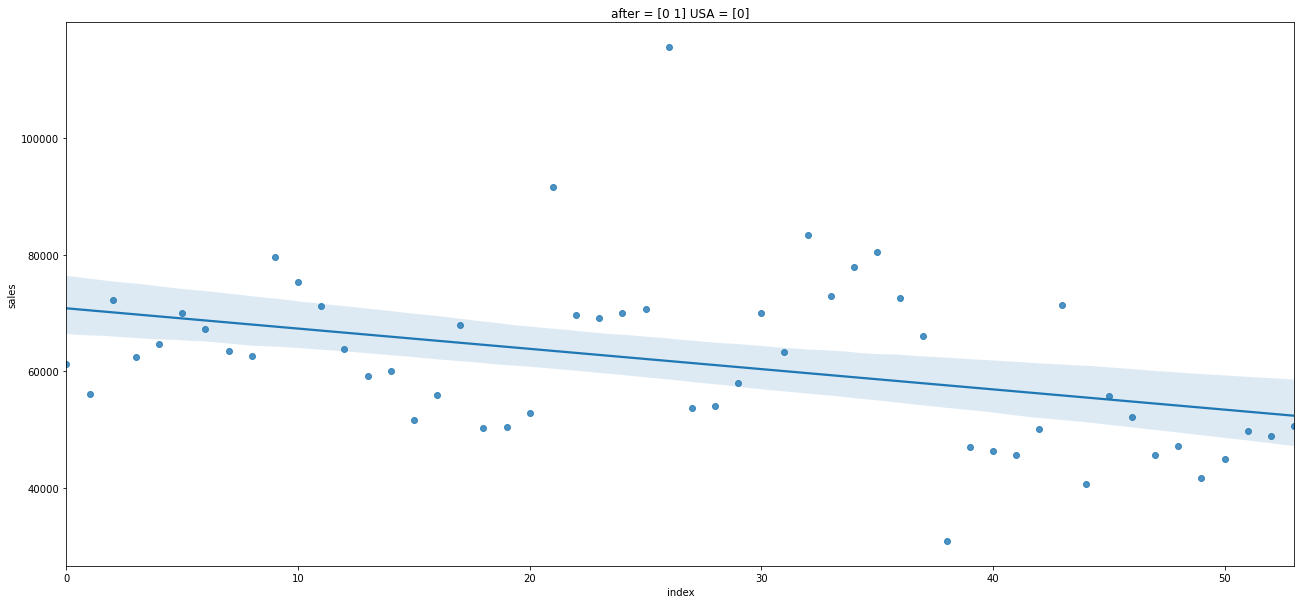

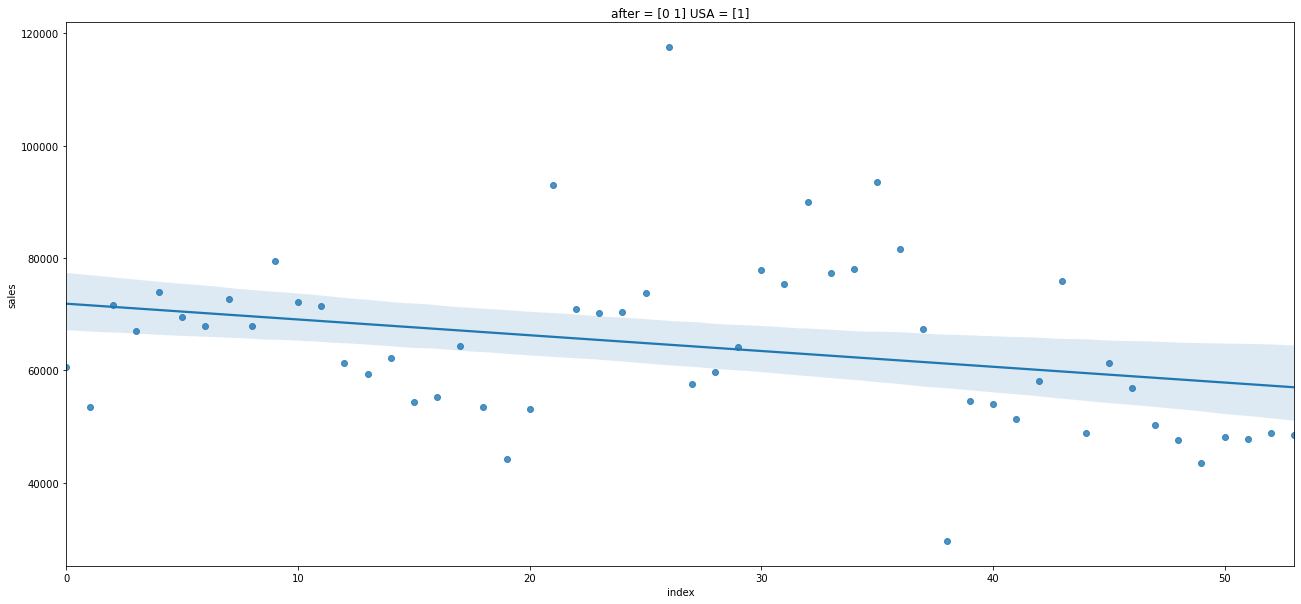

In [21]:
# Media de ventas en tienda por semana en función de si la tienda está o no en USA (sin tomar en cuenta implementación de BOPS)
for after, bm_dum1 in bm_grp.groupby(level=0):
    bm_dum2 =bm_dum1.reset_index().reset_index()
    #print(bm_dum2.groupby(['usa','after','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(bm_dum2["after"].unique()) + " USA = " + str(bm_dum2["usa"].unique()))
    sns.regplot(x="index", y="sales", data = bm_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=1)

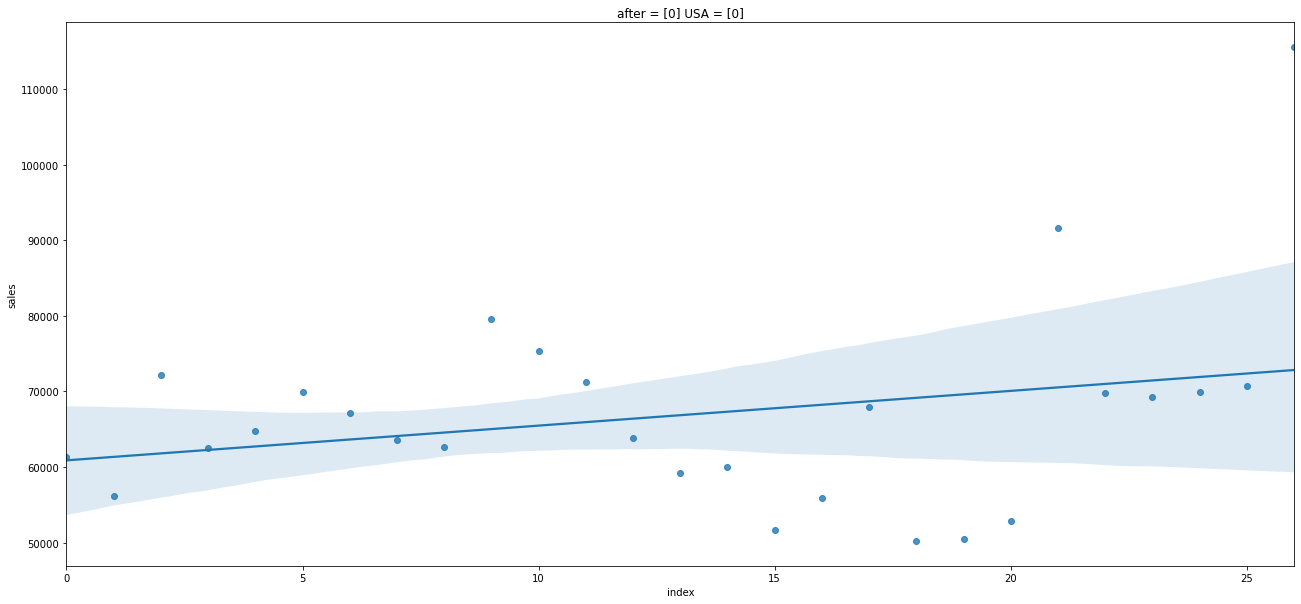

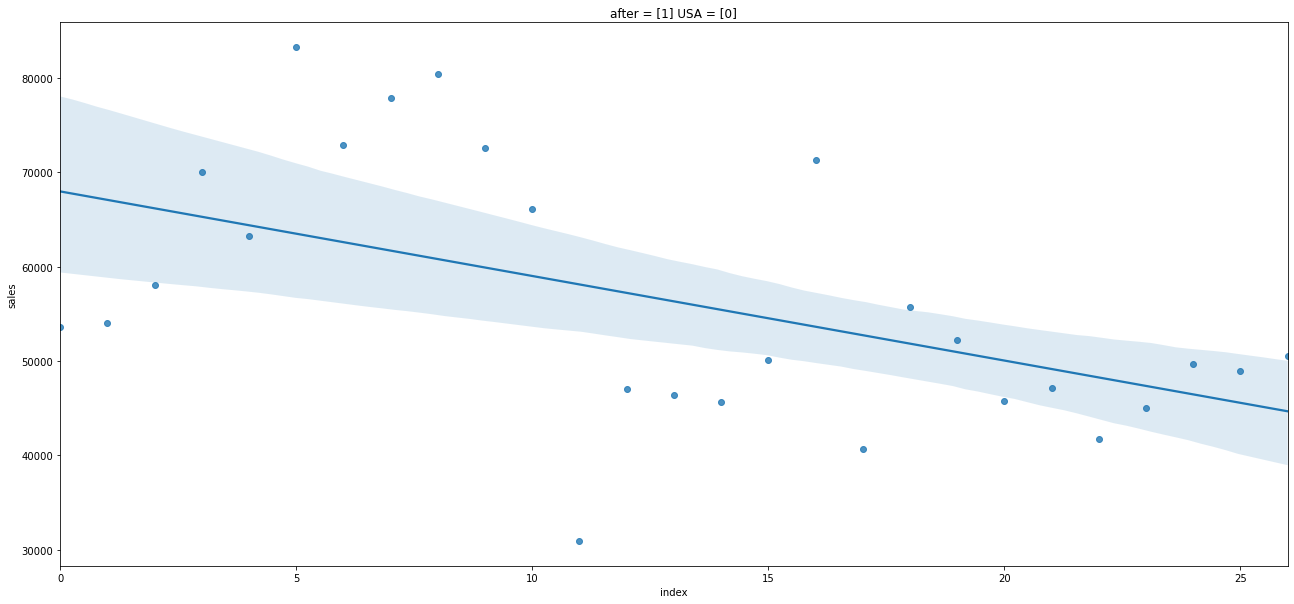

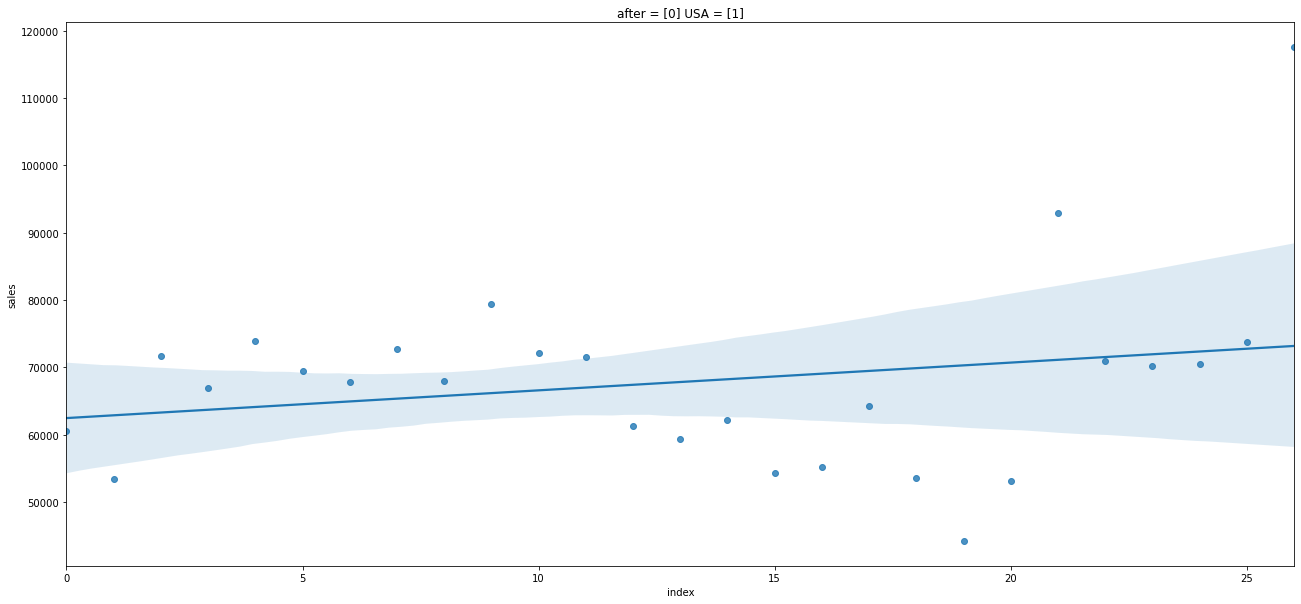

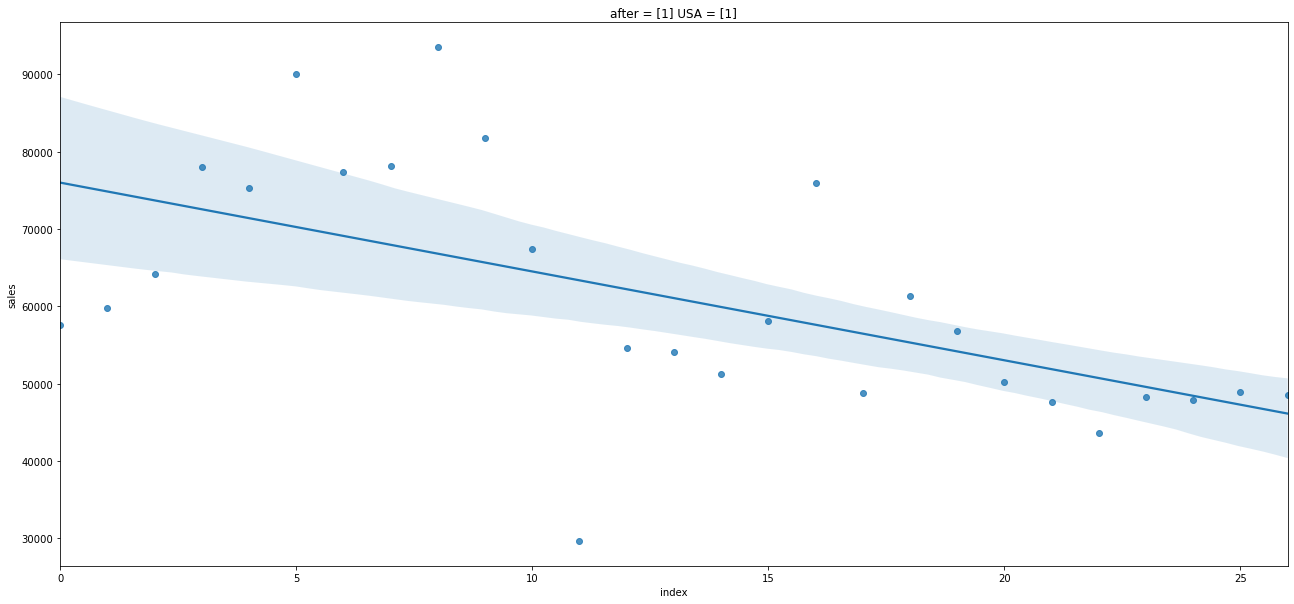

In [22]:
# Media de ventas por semana en tienda tomando en cuenta diferentes combinaciones de ventas antes y después de BOPS, y si la tienda está o no en USA
for after, bm_dum1 in bm_grp.groupby(level=[0,1]):
    bm_dum2 =bm_dum1.reset_index().reset_index()
    #print(bm_dum2)
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(bm_dum2["after"].unique()) + " USA = " + str(bm_dum2["usa"].unique()))
    sns.regplot(x="index", y="sales", data = bm_dum2, order=1)
    

## 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología

Mi estrategia para defiir si se ganó/perdió dinero después de la implementación del BOPS, es ajustar una curva a los datos de ventas (tanto en línea cómo en tiendas físicas) antes del lanzamiento del BOPS, para así poder proyectar las ventas en el semestre subsecuente, de acuerdo a la tendencia previa. De esta manera tendríamos una proyección de ventas siguiendo la tendencia anterior a BOPS, la cual se comparará con las ventas reales en ese segundo semestre donde ya se implementó el BOPS.

Ante esta estrategia surgen dos cuestionamientos principales: ¿es valido un ajuste cuando el periodo de tiempo es tan corto y al parecer podría generar una proyección errónea debido a las variaciones estacionales? y ¿Que conjuntos de datos se usarán? Puesto que en los datos de las ventas en línea no se sabe el país dónde se realizó la venta (es decir, no se sabe si en realidad fue "afectada" por el BOPS dado que en Canadá no se implementó este programa). Mientras que en los datos de ventas en tiendas físicas, si bien si se conoce el país de la venta y, en consecuencia, si la venta pudo o no haberse realizado usando el BOPS (pues se cooce el país), sin embargo, tampoco se tiene la certeza de qué porcentaje de esas ventas se realizó realmente usando el BOPS, además de que el BOPS se usa en ventas online y no en tiendas físicas.
 
Entonces, para la cuestión del ajuste que usaré, decidí que era conveniente usar un polinomial de orden superior, puesto que al probar estos ajustes en datos de ventas en línea y en tienda física limitados por semestre dónde se implementó o no el BOPS, observé que las curvas ajustadas tienen un comportamiento muy similar sin importar si se trata del primero o segundo semestre, lo cual me sugiere que el resultdo que obtenga será razonablemente bueno y pueda ayudarnos a ganar entendimiento del comportamiento de las ventas.

Por otro lado, con respecto al conjunto de datos a usar, decidí realizar el análisis usando todos los datos. Esto porque si bien no sabemos exactamente que ventas se realizaron o no usando BOPS, a partir de las proyecciones anteriormente descritas, podré obtener una estimación que nos pueda dar una idea lo suficientemente clara sobre el efecto económico de la implementación del BOPS (a partir de tendencias implicitas en los datos, que permitan indagar el comportamiento general, aunque el detalle se descoozca). Es importante recalcar que esta posible pérdida o ganancia puede estar reflejando una tendencia existente en los volúmenes de venta, pero mientras no se cuente con más datos, el intento de eliminar esta tendencia aparente con los datos que se cuentan, podría no ser muy útil. Entonces, mantendré el análisis simple intentando obtener el mayor entendimiento posible con los datos que se cuentan (y el tiempo de análisis con que cuento).

Los resultados obtenidos fueron:

- Pérdida de US$ 30,725,207.00 (calculado con regresión polinomial de orden 3)

(Como referencia agrego el resultado usando regresión lineal: pérdida de US$40,378,899.61, como había previsto, la regresión lineal arroja un resultado más grande, el cual me parece está afectado por la estacionalidad de los datos)

### Análisis visual para definir el orden del polinomio que se usará para el ajuste de la curva

<AxesSubplot:title={'center':'Media de ventas en línea por semana'}, xlabel='index', ylabel='sales'>

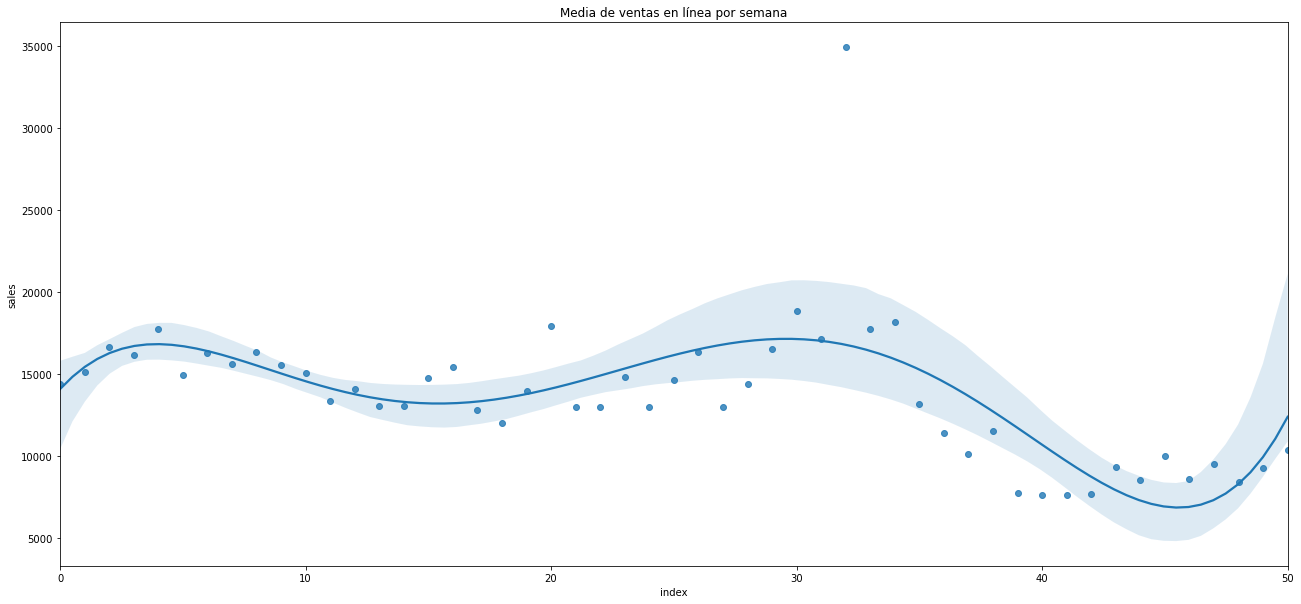

In [23]:
# TODO En línea
# Media de ventas en línea por semana
plt.figure(figsize=(22,10))
plt.title("Media de ventas en línea por semana")
sns.regplot(x="index", y="sales", data = online.groupby(['year_week'])['sales'].mean().reset_index().reset_index(), order=5)

<AxesSubplot:title={'center':'Media de ventas en tienda por semana'}, xlabel='index', ylabel='sales'>

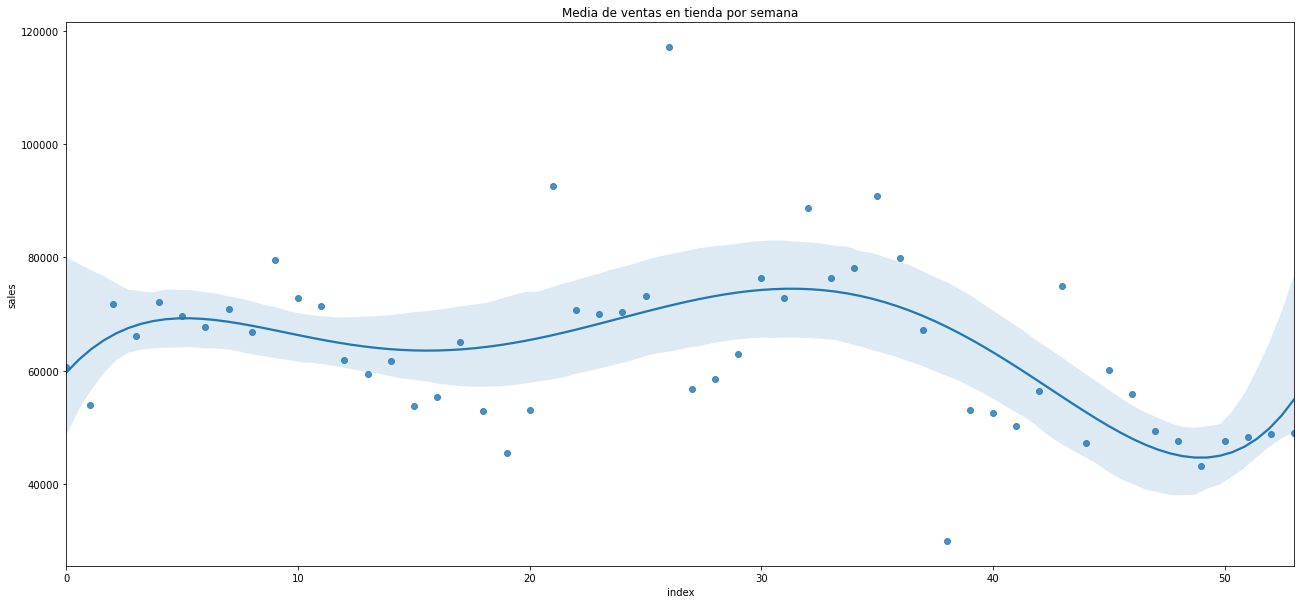

In [24]:
# TODO tiendas
# Media de ventas en tienda por semana ajustando un polinomio de orden 5
plt.figure(figsize=(22,10))
plt.title("Media de ventas en tienda por semana")
sns.regplot(x="index", y="sales", data = bm.groupby(['year_week'])['sales'].mean().reset_index().reset_index(), order=5)

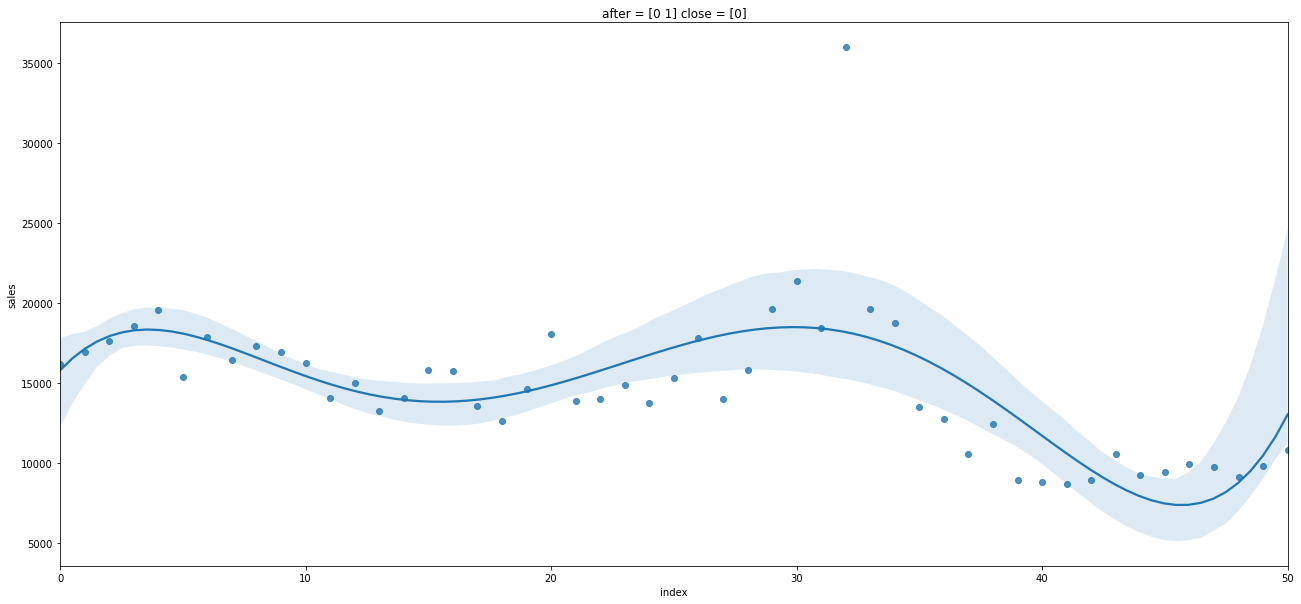

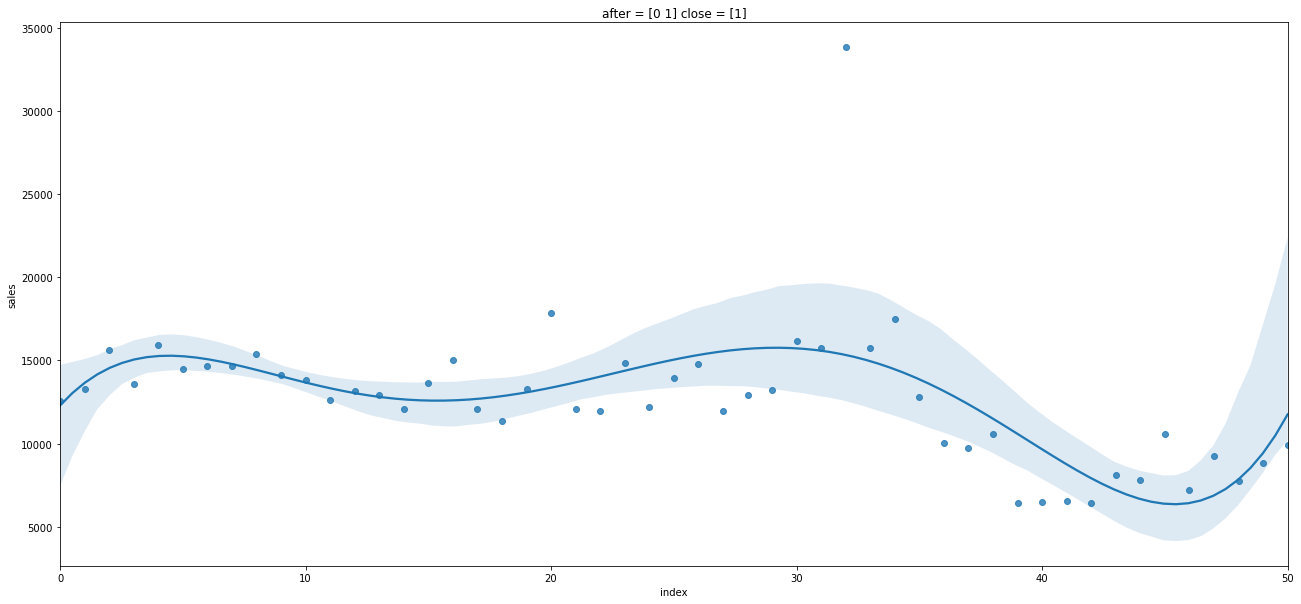

In [25]:
# CERCA vs LEJOS - en línea
# Media de ventas en línea por semana en función de la cercanía o lejanía de tiendas (sin tomar en cuenta implementación de BOPS)
for after, online_dum1 in online_grp.groupby(level=0):
    online_dum2 =online_dum1.reset_index().reset_index()
    #print(online_dum2.groupby(['close','after','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=5)

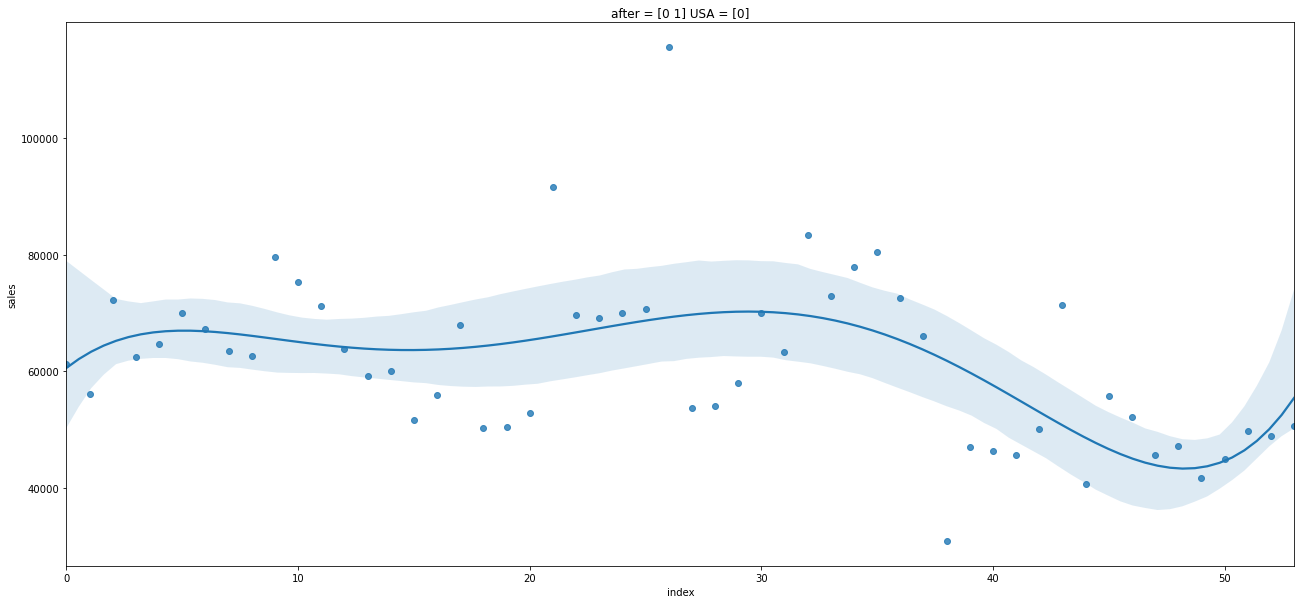

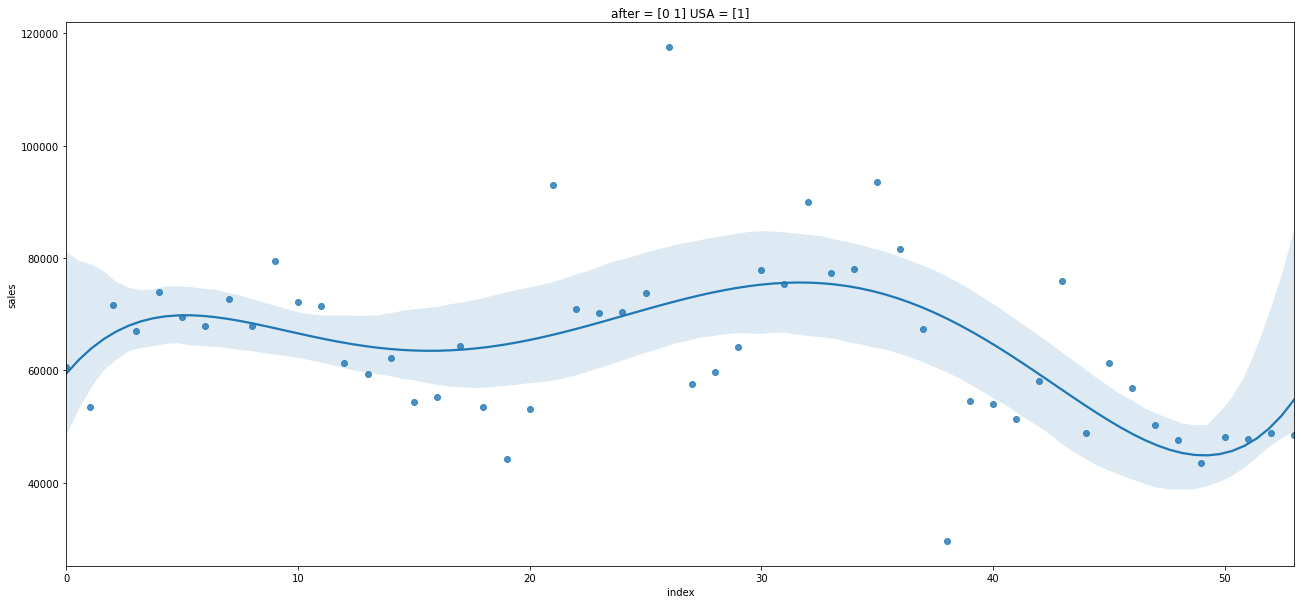

In [26]:
# CANADA vs USA - en tienda
# Media de ventas en tienda por semana en función de si la tienda está o no en USA (sin tomar en cuenta implementación de BOPS)
for after, bm_dum1 in bm_grp.groupby(level=0):
    bm_dum2 =bm_dum1.reset_index().reset_index()
    #print(bm_dum2.groupby(['usa','after','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(bm_dum2["after"].unique()) + " USA = " + str(bm_dum2["usa"].unique()))
    sns.regplot(x="index", y="sales", data = bm_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=5)

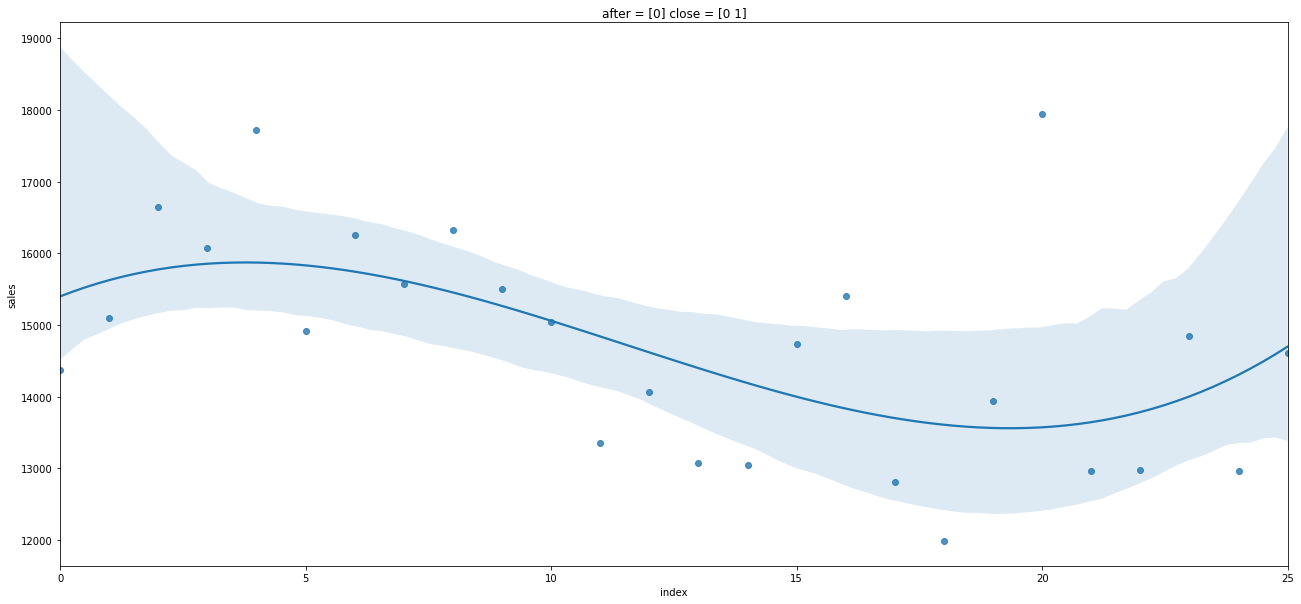

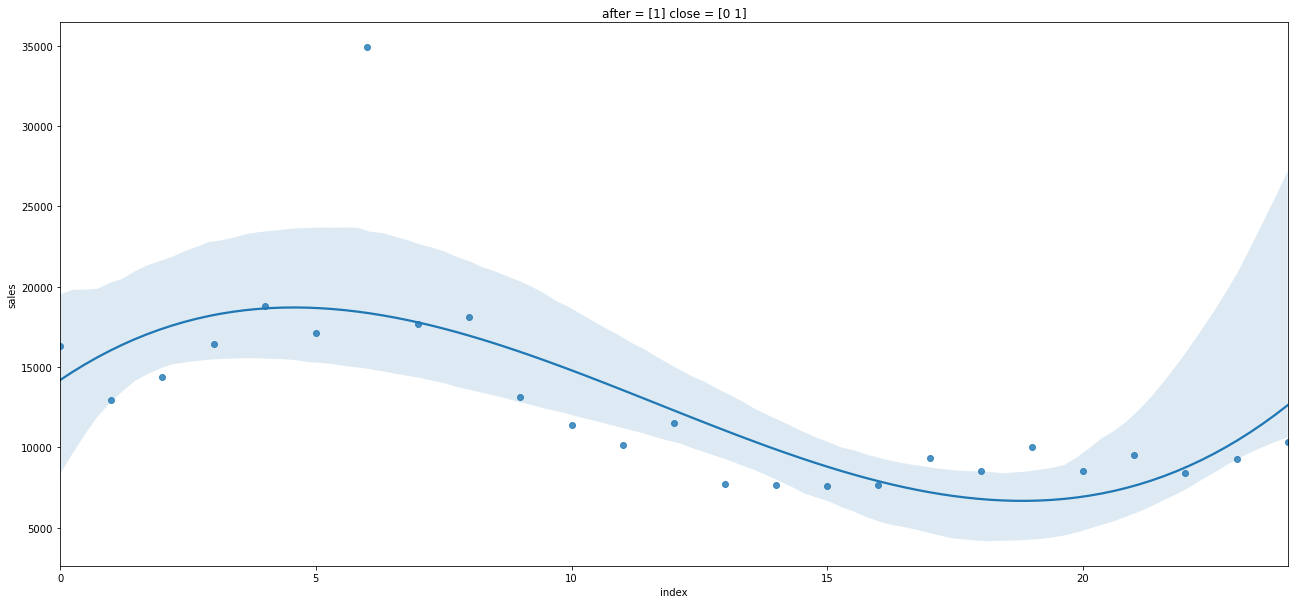

In [27]:
# ANTES/DESPUES - ONLINE
#Media de ventas en línea por semana antes y después de BOPS (sin tomar en cuenta cercanía a tiendas)
for after, online_dum1 in online_grp.groupby(level=1):
    online_dum2 =online_dum1.reset_index().reset_index()
    #print(online_dum2.groupby(['after','close','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=3)

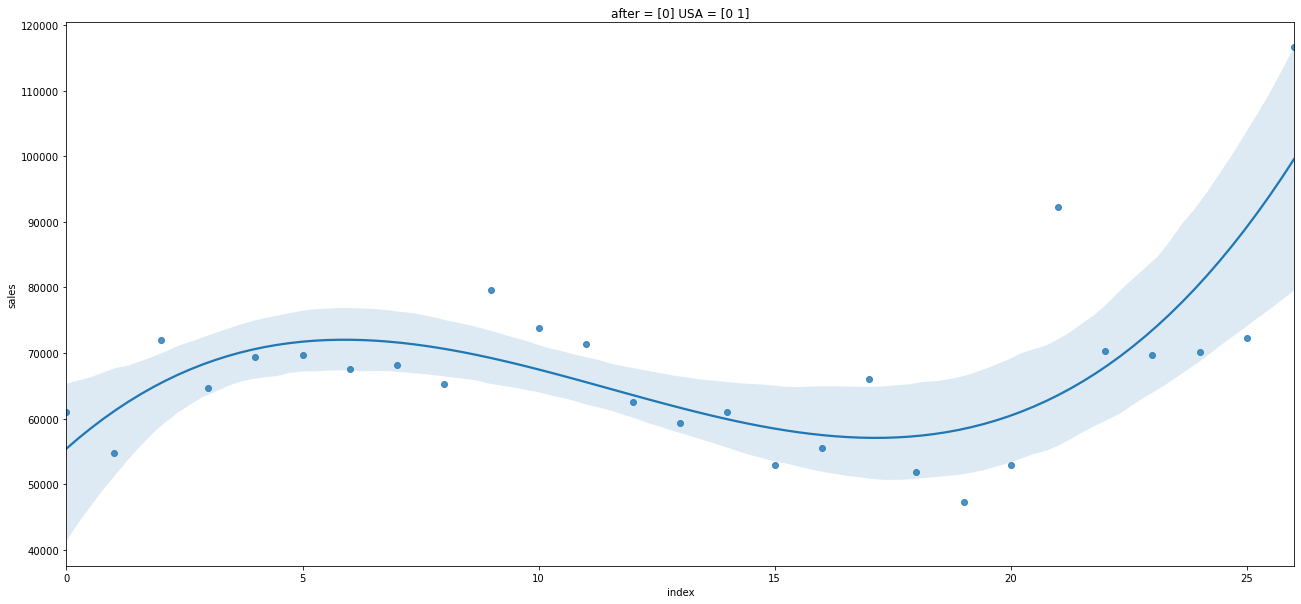

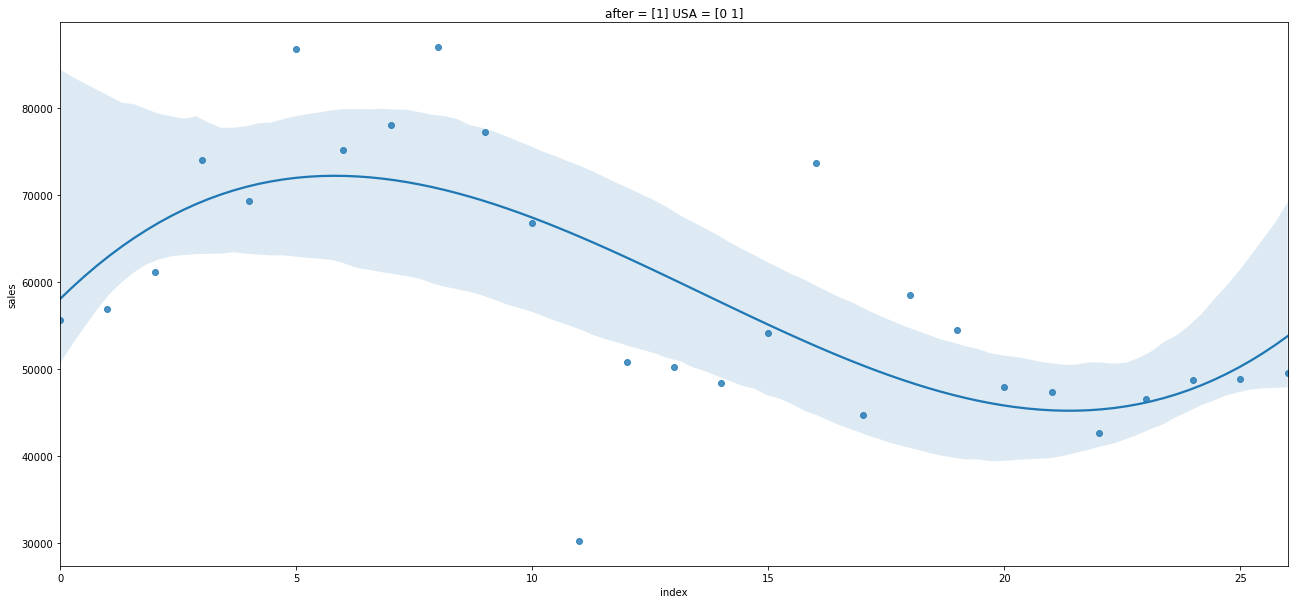

In [28]:
# ANTES/DESPUES - TIENDA
#Media de ventas por semana en tienda por semana antes y después de BOPS (sin tomar si están en USA o no, es decir, en Canadá)
for after, bm_dum1 in bm_grp.groupby(level=1):
    bm_dum2 =bm_dum1.reset_index().reset_index()
    #print(bm_dum2.groupby(['after','usa','year_week'])['sales'].mean().reset_index())
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(bm_dum2["after"].unique()) + " USA = " + str(bm_dum2["usa"].unique()))
    sns.regplot(x="index", y="sales", data = bm_dum2.groupby(['after','year_week'])['sales'].mean().reset_index().reset_index(), order=3)

### Cálculo

In [29]:
lm = LinearRegression()

In [30]:
ol_ByWeek = online.groupby(['year_week'])['sales'].sum().reset_index().reset_index()
ol_ByWeekNOBOPS = ol_ByWeek[0:26]
ol_ByWeekBOPS = ol_ByWeek[26:]


In [31]:
bm_ByWeek = bm.groupby(['year_week'])['sales'].sum().reset_index().reset_index()
bm_ByWeekNOBOPS = bm_ByWeek[0:27]
bm_ByWeekBOPS = bm_ByWeek[27:]

In [32]:
X= DataFrame(ol_ByWeekNOBOPS['index'])
Y= DataFrame(ol_ByWeekNOBOPS['sales'])
lm.fit(X,Y)
Xhat = DataFrame(ol_ByWeekBOPS['index'])
Yhat = lm.predict(Xhat)
Tot_ol_est = Yhat.sum()
Tot_ol_real = ol_ByWeekBOPS['sales'].sum()
Dif_ol = Tot_ol_est - Tot_ol_real
Dif_ol

-2545314.6666666567

In [33]:
X= DataFrame(bm_ByWeekNOBOPS['index'])
Y= DataFrame(bm_ByWeekNOBOPS['sales'])
lm.fit(X,Y)
Xhat = DataFrame(bm_ByWeekBOPS['index'])
Yhat = lm.predict(Xhat)
Tot_bm_est = Yhat.sum()
Tot_bm_real = bm_ByWeekBOPS['sales'].sum()
Dif_bm = Tot_bm_est - Tot_bm_real
Dif_bm

42924214.28021979

In [34]:
Dif_tot = Dif_ol + Dif_bm
Dif_tot

40378899.61355314

### Con regresión polinomial

In [35]:
poly = PolynomialFeatures(degree=3)

In [36]:
X= ol_ByWeekNOBOPS['index']
Y= ol_ByWeekNOBOPS['sales']
f = np.polyfit(X,Y,3)
p = np.poly1d(f)
Xhat = ol_ByWeekNOBOPS['index']
Yhat = p(Xhat)
Yhat
Tot_ol_est_poly = Yhat.sum()
Dif_ol_poly = Tot_ol_est_poly - Tot_ol_real
Dif_ol_poly

13613629.000000075

In [37]:
X= bm_ByWeekNOBOPS['index']
Y= bm_ByWeekNOBOPS['sales']
f = np.polyfit(X,Y,3)
p = np.poly1d(f)
Xhat = bm_ByWeekNOBOPS['index']
Yhat = p(Xhat)
Yhat
Tot_bm_est_poly = Yhat.sum()
Dif_bm_poly = Tot_bm_est_poly - Tot_bm_real
Dif_bm_poly

17111578.0

In [38]:
Dif_tot_poly = Dif_ol_poly + Dif_bm_poly
Dif_tot_poly

30725207.000000075